<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Exponentially_Weighted_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.isna().sum()

Passengers    0
dtype: int64

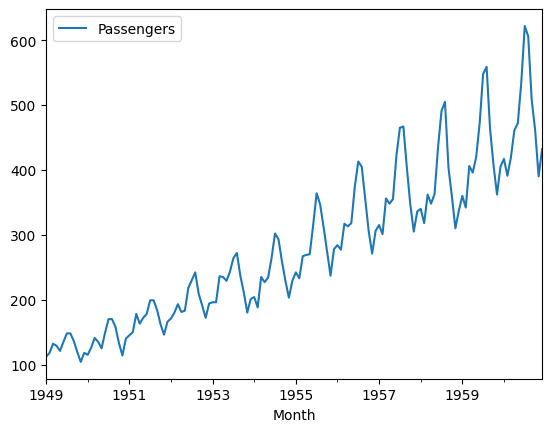

In [7]:
df.plot();

In [22]:
alpha = 0.2

In [23]:
df['EWMA'] = df['Passengers'].ewm(alpha = alpha,adjust = False).mean()

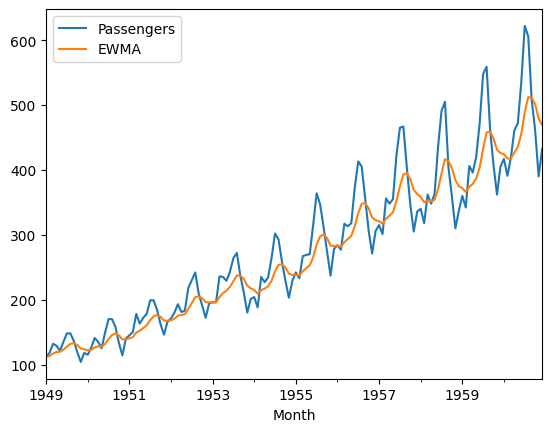

In [24]:
df.plot();

In [25]:
df.head()

,Passengers,EWMA
Month,,
1949-01-01,112,112.0000
1949-02-01,118,113.2000
1949-03-01,132,116.9600
1949-04-01,129,119.3680
1949-05-01,121,119.6944


In [27]:
manual_ewma = []
for x in df['Passengers'].to_numpy():
  if len(manual_ewma) > 0:
     xhat = alpha * x + (1-alpha) * manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['manual'] = manual_ewma

<Axes: xlabel='Month'>

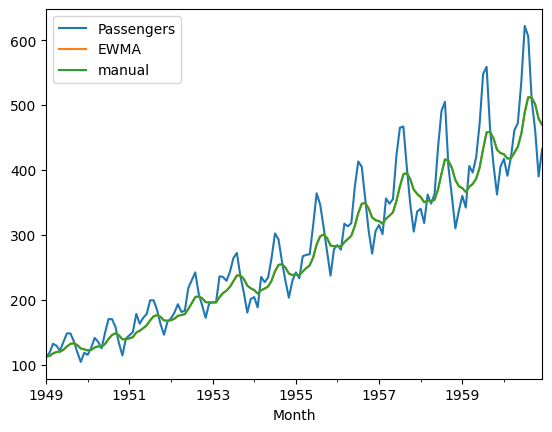

In [28]:
df.plot()

In [29]:
df.head()

,Passengers,EWMA,manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [ ]:
df.drop('manual',axis = 1,inplace = True)